In [ ]:
from google.colab import drive
drive.mount('/content/grive')


Mounted at /content/grive


In [ ]:
import pandas as pd
import numpy as np 
data = pd.read_csv('/content/grive/MyDrive/Data/findata.csv')

In [ ]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
data.size

4573308

In [ ]:
data.shape

(381109, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
# now lets check for object data types 
data.select_dtypes(include=np.object).head()

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


In [ ]:
# checking for null values 
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
"""3 are categorical features,remaining 8 are numerical in nature.            """

'3 are categorical features,remaining 8 are numerical in nature.            '

In [ ]:
# data cleaning step now 

In [ ]:
for i in data.select_dtypes(include=np.object).columns:
    print(i)
    print(data[i].unique()) # all values 
    print() # for spacing in output 

Gender
['Male' 'Female']

Vehicle_Age
['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage
['Yes' 'No']



In [ ]:
data.describe().iloc[:,:-1]

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000


In [ ]:
#for numerical data 
data.select_dtypes(include=np.number).head().iloc[:,:-1]

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,40454.0,26.0,217
1,2,76,1,3.0,0,33536.0,26.0,183
2,3,47,1,28.0,0,38294.0,26.0,27
3,4,21,1,11.0,1,28619.0,152.0,203
4,5,29,1,41.0,1,27496.0,152.0,39


In [ ]:
# i observation
"""iD will be of no use to us as it will be unique to each record   """

'iD will be of no use to us as it will be unique to each record   '

In [ ]:
data.drop('id',axis =1,inplace =True)

In [ ]:
# now converting the data type into int for standardisation 

data[["Region_Code","Policy_Sales_Channel"]] = data[["Region_Code","Policy_Sales_Channel"]].astype('int').astype("object")


In [ ]:
# categorical feaures 

data[["Driving_License","Previously_Insured","Response"]] = data[["Driving_License","Previously_Insured","Response"]].astype('object') 

In [ ]:
# labelling this  
data.Driving_License.replace({1:"Has_License",0:"No_License"},inplace=True)
data.Previously_Insured.replace({1:"Vehicle_Insured",0:"Vehicle_Not_Insured"},inplace=True)
data.Vehicle_Damage.replace({"Yes":"Vehicle_Damaged","No":"Vehicle_Not_Damaged"},inplace=True)
data.Vehicle_Age.replace({"> 2 Years":"MoreThan2Years","1-2 Year":"Years1-2","< 1 Year":"LessThan1Year"},inplace=True)

In [ ]:
data.select_dtypes(include=np.object).head()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
0,Male,Has_License,28,Vehicle_Not_Insured,MoreThan2Years,Vehicle_Damaged,26,1
1,Male,Has_License,3,Vehicle_Not_Insured,Years1-2,Vehicle_Not_Damaged,26,0
2,Male,Has_License,28,Vehicle_Not_Insured,MoreThan2Years,Vehicle_Damaged,26,1
3,Male,Has_License,11,Vehicle_Insured,LessThan1Year,Vehicle_Not_Damaged,152,0
4,Female,Has_License,41,Vehicle_Insured,LessThan1Year,Vehicle_Not_Damaged,152,0


In [ ]:
data.select_dtypes(include=np.number).head()

,Age,Annual_Premium,Vintage
0,44,40454.0,217
1,76,33536.0,183
2,47,38294.0,27
3,21,28619.0,203
4,29,27496.0,39


In [ ]:
# data analysis 

In [ ]:
num_data = data.select_dtypes(include=np.number)
cat_data = data.select_dtypes(include=np.object)

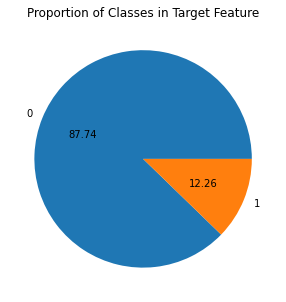

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))
proportions = cat_data.Response.value_counts(1)*100
labels = cat_data.Response.value_counts(1).index
plt.pie(proportions,labels=labels,autopct="%.2f")
plt.title("Proportion of Classes in Target Feature")
plt.show()

In [ ]:
num_data.skew()

Age               0.672539
Annual_Premium    1.766087
Vintage           0.003030
dtype: float64

In [ ]:
num_data.describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


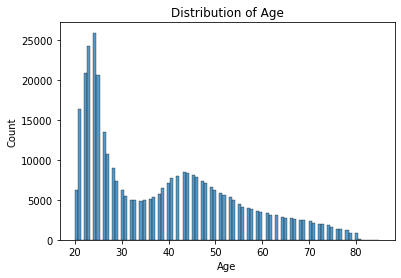

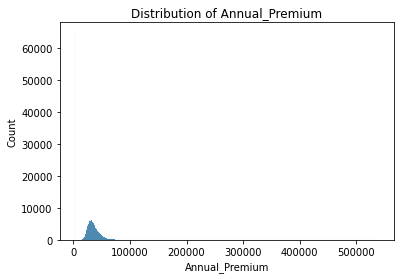

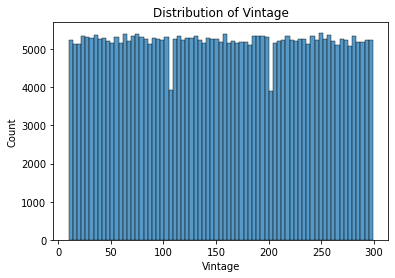

In [ ]:
import seaborn as sns
for i in num_data.columns:
    sns.histplot(num_data[i])
    plt.title(f"Distribution of {i}")
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


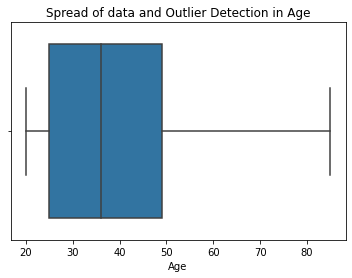

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


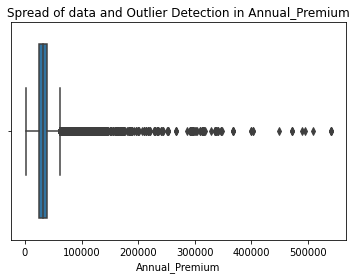

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


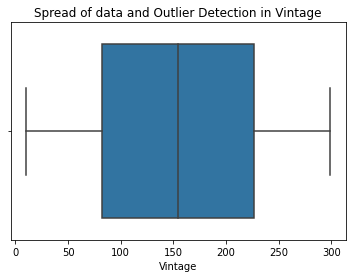

In [ ]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.title(f"Spread of data and Outlier Detection in {i}")
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


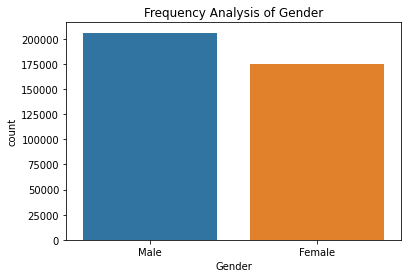

In [ ]:
sns.countplot(cat_data.Gender)
plt.title("Frequency Analysis of Gender")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


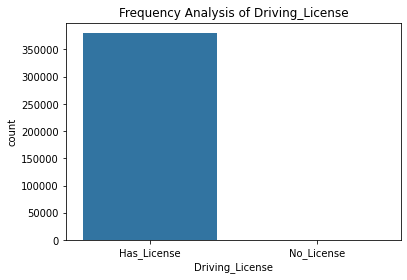

In [ ]:
sns.countplot(cat_data.Driving_License)
plt.title("Frequency Analysis of Driving_License")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


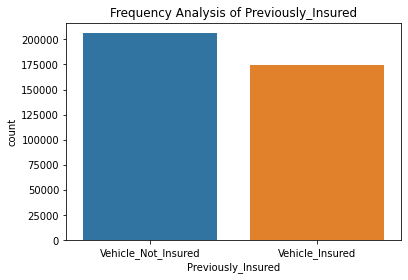

In [ ]:
sns.countplot(cat_data.Previously_Insured)
plt.title("Frequency Analysis of Previously_Insured")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


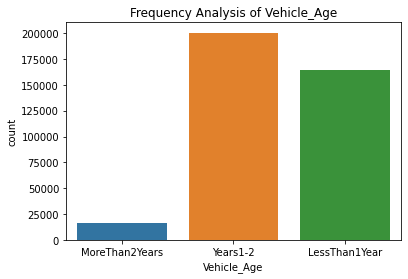

In [ ]:
sns.countplot(cat_data.Vehicle_Age)
plt.title("Frequency Analysis of Vehicle_Age")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


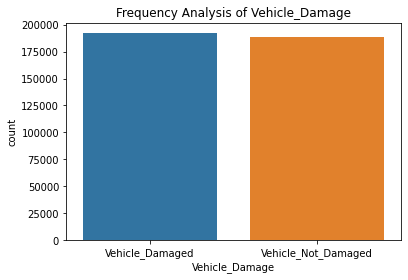

In [ ]:
sns.countplot(cat_data.Vehicle_Damage)
plt.title("Frequency Analysis of Vehicle_Damage")
plt.show()

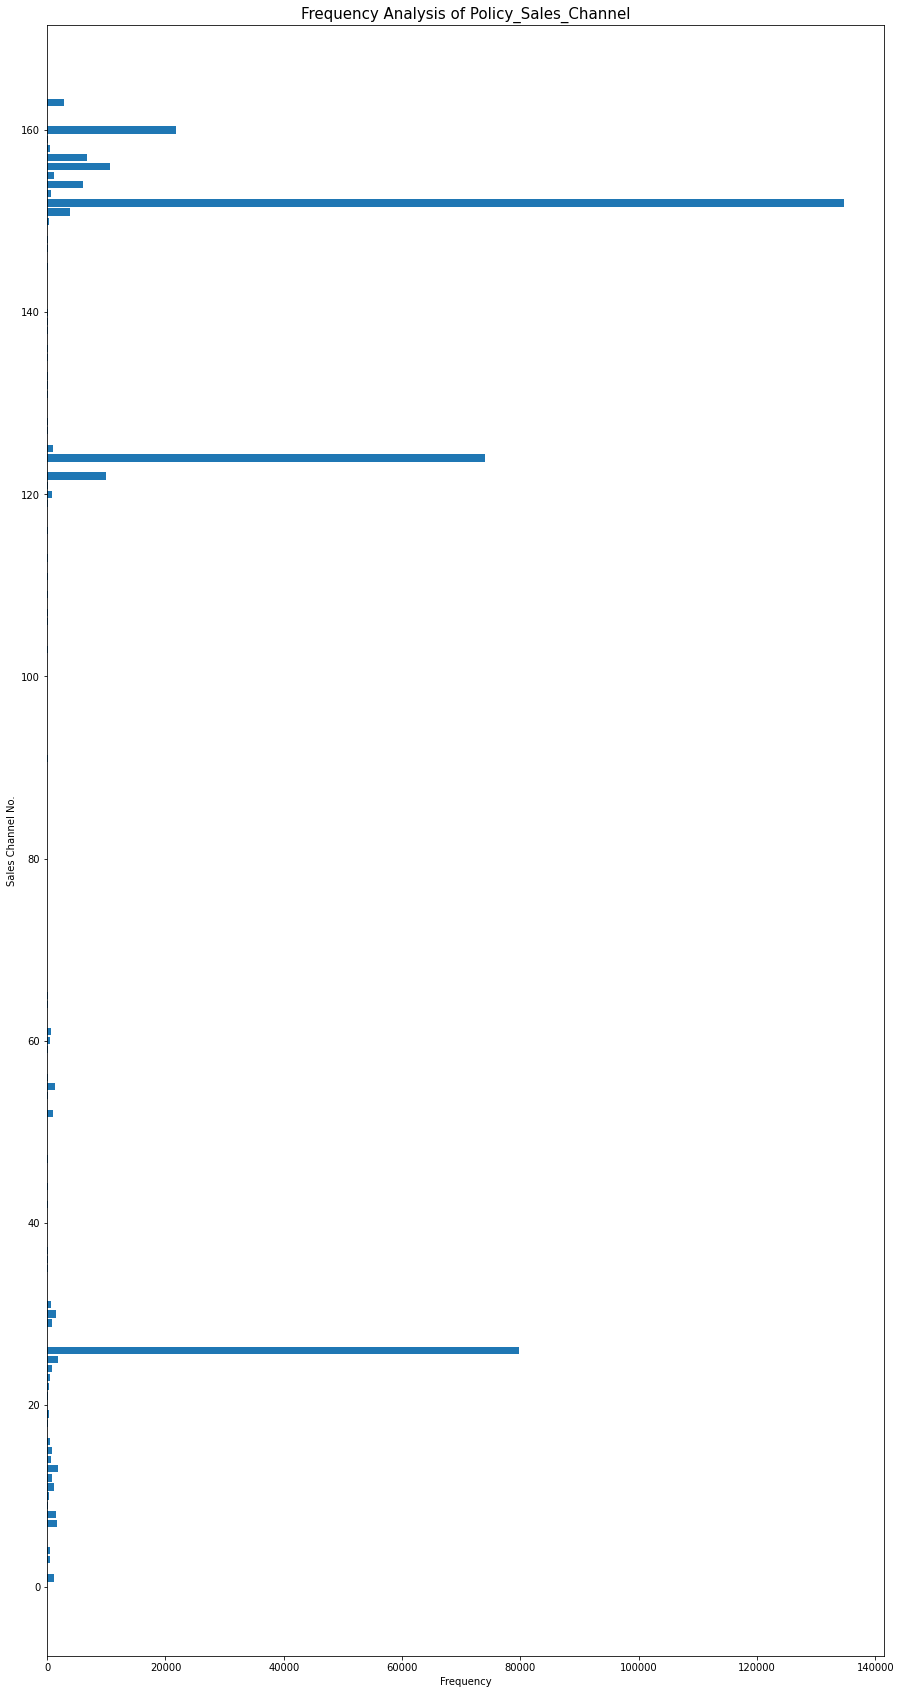

In [ ]:
plt.figure(figsize=(15,30))
labels = data.Policy_Sales_Channel.value_counts().index
values = data.Policy_Sales_Channel.value_counts()
plt.barh(y=labels,width=values)
plt.ylabel("Sales Channel No.")
plt.xlabel("Frequency")
plt.title("Frequency Analysis of Policy_Sales_Channel",size=15)
plt.show()

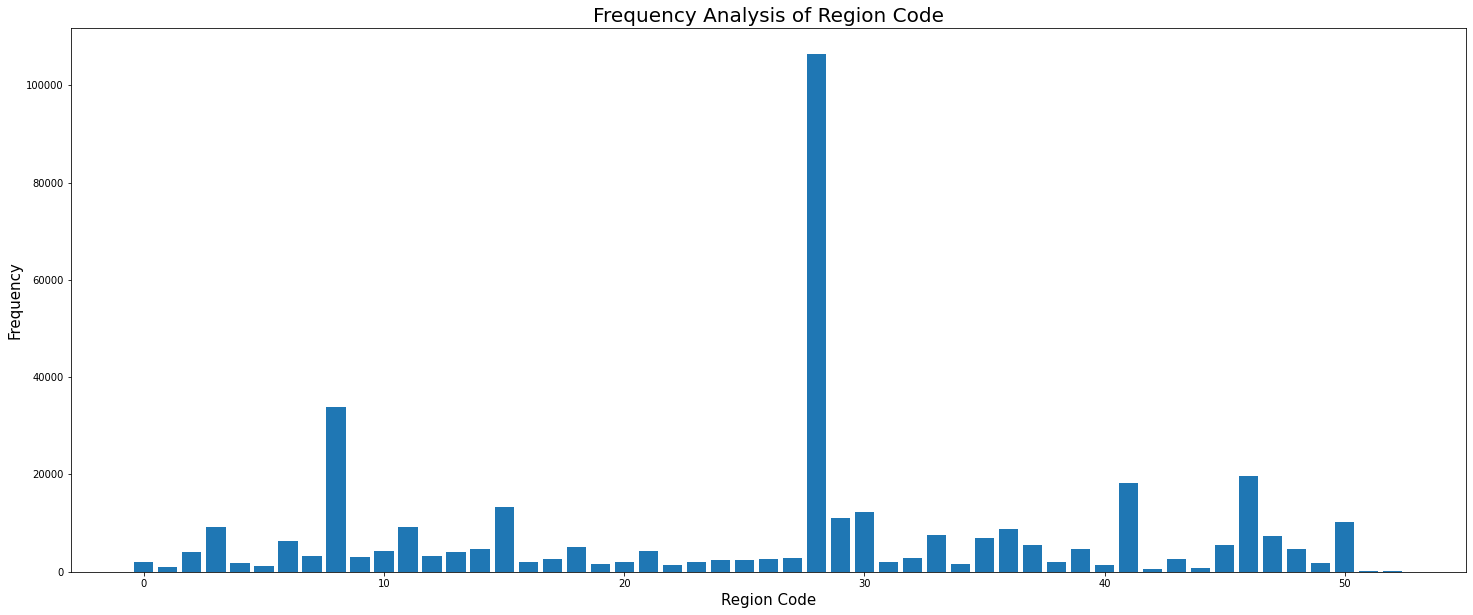

In [ ]:
plt.figure(figsize=(25,10))
labels = data.Region_Code.value_counts().index
values = data.Region_Code.value_counts()
plt.bar(x=labels,height=values)
plt.xlabel("Region Code",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Frequency Analysis of Region Code",size=20)
plt.show()

In [ ]:
# observations made here 
"""Numerical Features - 
 1. most of the insurance holders is around 20-30 years,
 2.health insurance holders pay per annum is around 31000.
 3.Age and Annual Premium are postively skewed
 
 #catrgorical 
 1.all the health insurance holders have a driving license
 2.than 50% of the vehicle owners have vehicles which are around 1-2 years old
 3.
   """

'Numerical Features - \n 1. most of the insurance holders is around 20-30 years,\n 2.health insurance holders pay per annum is around 31000.\n 3.Age and Annual Premium are postively skewed\n \n #catrgorical \n 1.all the health insurance holders have a driving license\n 2.than 50% of the vehicle owners have vehicles which are around 1-2 years old\n 3.\n   '

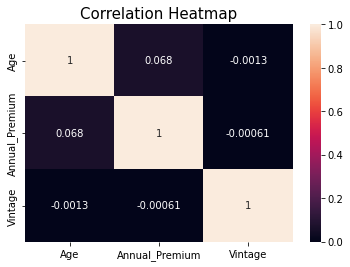

In [ ]:
# multi variate analysis 
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation Heatmap",size=15)
plt.show()


In [ ]:
# We can conclude that the target classes aren't going to be linearly seperable based on the numerical features.
#Also, based on presence of positive skewnes and extreme outliers in the dataset, 
#transformations might need to be performed on the numerical features, which could hurt the interpretation of the model and busines interpretation.

In [ ]:
data_copy = data.copy()

In [ ]:
data.drop(["Vintage","Annual_Premium","Driving_License"],axis=1,inplace=True)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder

In [ ]:
"""Except region and sales policy, all other features can be one hot encoded as they have only around 2-3 unique categories     """

'Except region and sales policy, all other features can be one hot encoded as they have only around 2-3 unique categories     '

In [ ]:
Region_Dict = {}
for i,a in list(zip(data.Region_Code.value_counts().index.unique(),data.Region_Code.value_counts(1)*100)):
    if a < 2:
        Region_Dict[i] = "Others"
    else:
        Region_Dict[i] = "Region_" + str(i)

In [ ]:
Policy_Sales_Channel_Dict = {}
for i,a in list(zip(data.Policy_Sales_Channel.value_counts().index.unique(),data.Policy_Sales_Channel.value_counts(1)*100)):
    if a < 2:
        Policy_Sales_Channel_Dict[i] = "Others"
    else:
        Policy_Sales_Channel_Dict[i] = "Channel_" + str(i)

In [ ]:
data.Region_Code = data.Region_Code.map(Region_Dict)
data.Policy_Sales_Channel = data.Policy_Sales_Channel.map(Policy_Sales_Channel_Dict)

In [ ]:
X = data.drop("Response",axis=1)
y= data.Response.astype("int")

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.30,random_state=0,stratify=y)

In [ ]:
xtrain.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
316624,Female,25,Others,Vehicle_Not_Insured,LessThan1Year,Vehicle_Damaged,Channel_152
126373,Female,23,Region_46,Vehicle_Insured,LessThan1Year,Vehicle_Not_Damaged,Channel_152
30736,Male,22,Others,Vehicle_Not_Insured,LessThan1Year,Vehicle_Damaged,Channel_152
156924,Female,21,Region_30,Vehicle_Insured,LessThan1Year,Vehicle_Not_Damaged,Channel_160
86112,Female,23,Region_8,Vehicle_Insured,LessThan1Year,Vehicle_Not_Damaged,Channel_152


In [ ]:
xtrain.select_dtypes(include=np.object).nunique()

Gender                   2
Region_Code             13
Previously_Insured       2
Vehicle_Age              3
Vehicle_Damage           2
Policy_Sales_Channel     7
dtype: int64

In [ ]:
#No. of categories in Region and Policy Sales Channel have been drastically reduced and hence they can be one hot encoded

In [ ]:
OHE = OneHotEncoder(drop="first",handle_unknown="error").fit(xtrain[["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"]])

In [ ]:
xtrain_cat = pd.DataFrame(OHE.transform(xtrain[["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"]]).toarray(),columns=OHE.get_feature_names(),index=xtrain.index)

In [ ]:
xtest_cat = pd.DataFrame(OHE.transform(xtest[["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"]]).toarray(),columns=OHE.get_feature_names(),index=xtest.index)

In [ ]:
xtrain_cat.head()

,x0_Male,x1_Vehicle_Not_Insured,x2_MoreThan2Years,x2_Years1-2,x3_Vehicle_Not_Damaged,x4_Region_11,x4_Region_15,x4_Region_28,x4_Region_29,x4_Region_3,x4_Region_30,x4_Region_33,x4_Region_36,x4_Region_41,x4_Region_46,x4_Region_50,x4_Region_8,x5_Channel_124,x5_Channel_152,x5_Channel_156,x5_Channel_160,x5_Channel_26,x5_Others
316624,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
126373,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30736,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
156924,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
86112,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
xtrain = xtrain.merge(xtrain_cat,left_index=True,right_index=True).drop(["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"],axis=1)

In [ ]:
xtest = xtest.merge(xtest_cat,left_index=True,right_index=True).drop(["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"],axis=1)

In [ ]:
xtrain.head()

,Age,x0_Male,x1_Vehicle_Not_Insured,x2_MoreThan2Years,x2_Years1-2,x3_Vehicle_Not_Damaged,x4_Region_11,x4_Region_15,x4_Region_28,x4_Region_29,x4_Region_3,x4_Region_30,x4_Region_33,x4_Region_36,x4_Region_41,x4_Region_46,x4_Region_50,x4_Region_8,x5_Channel_124,x5_Channel_152,x5_Channel_156,x5_Channel_160,x5_Channel_26,x5_Others
316624,25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
126373,23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30736,22,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
156924,21,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
86112,23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# model building 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,f1_score,classification_report,confusion_matrix
results = pd.DataFrame({"Model":None,"Train F1":None,"Test F1":None,"CV Mean F1":None,"CV std in scores":None},index=range(0,6))

In [ ]:
#bernolli 
nb = BernoulliNB().fit(xtrain.drop("Age",axis=1),ytrain)
f1_train_nb = f1_score(ytrain,nb.predict(xtrain.drop("Age",axis=1)))
f1_test_nb = f1_score(ytest,nb.predict(xtest.drop("Age",axis=1)))
print("f1:",f1_train_nb)
print()
print("Model Performance Report")
print("Training Performance:",classification_report(ytrain,nb.predict(xtrain.drop("Age",axis=1))),sep="\n")
print()
print("Test Performance:",classification_report(ytest,nb.predict(xtest.drop("Age",axis=1))),sep="\n")

f1: 0.42011878309282097

Model Performance Report
Training Performance:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83    234079
           1       0.29      0.78      0.42     32697

    accuracy                           0.74    266776
   macro avg       0.62      0.75      0.62    266776
weighted avg       0.88      0.74      0.78    266776


Test Performance:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83    100320
           1       0.29      0.77      0.42     14013

    accuracy                           0.74    114333
   macro avg       0.62      0.75      0.62    114333
weighted avg       0.88      0.74      0.78    114333



In [ ]:
cv_nb = cross_val_score(BernoulliNB(),xtrain.drop("Age",axis=1),ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_nb.mean())
print("Deviation in f1 scores:",cv_nb.std())
results.iloc[0,0] = "Naive Bayes"
results.iloc[0,1] = f1_train_nb
results.iloc[0,2] = f1_test_nb
results.iloc[0,3] = cv_nb.mean()
results.iloc[0,4] = cv_nb.std()

Mean of f1 scores: 0.4194529861846674
Deviation in f1 scores: 0.0017372073381297208


In [ ]:
#decision tree 

dt = DecisionTreeClassifier().fit(xtrain,ytrain)
f1_train_dt = f1_score(ytrain,dt.predict(xtrain))
f1_test_dt = f1_score(ytest,dt.predict(xtest))
print("f1 score:",f1_train_dt)
print()
print("Model Performance Report")
print("Training Performance:",classification_report(ytrain,dt.predict(xtrain)),sep="\n")
print()
print("Test Performance:",classification_report(ytest,dt.predict(xtest)),sep="\n")

f1 score: 0.19277171908750856

Model Performance Report
Training Performance:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    234079
           1       0.69      0.11      0.19     32697

    accuracy                           0.89    266776
   macro avg       0.79      0.55      0.57    266776
weighted avg       0.87      0.89      0.85    266776


Test Performance:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93    100320
           1       0.35      0.06      0.10     14013

    accuracy                           0.87    114333
   macro avg       0.62      0.52      0.52    114333
weighted avg       0.82      0.87      0.83    114333



In [ ]:
cv_dt = cross_val_score(DecisionTreeClassifier(),xtrain,ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_dt.mean())
print("Deviation in f1 scores:",cv_dt.std())
results.iloc[1,0] = "Decision Tree"
results.iloc[1,1] = f1_train_dt
results.iloc[1,2] = f1_test_dt
results.iloc[1,3] = cv_dt.mean()
results.iloc[1,4] = cv_dt.std()

Mean of f1 scores: 0.11408334491187701
Deviation in f1 scores: 0.004679654398083485


In [ ]:
# random forest 
rf = RandomForestClassifier().fit(xtrain,ytrain)
f1_train_rf = f1_score(ytrain,rf.predict(xtrain))
f1_test_rf = f1_score(ytest,rf.predict(xtest))
print("f1:",f1_train_rf)
print()
print("Model Performance Report")
print("Training Performance:",classification_report(ytrain,rf.predict(xtrain)),sep="\n")
print()
print("Test Performance:",classification_report(ytest,rf.predict(xtest)),sep="\n")

f1: 0.2162258939076168

Model Performance Report
Training Performance:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    234079
           1       0.66      0.13      0.22     32697

    accuracy                           0.89    266776
   macro avg       0.78      0.56      0.58    266776
weighted avg       0.86      0.89      0.85    266776


Test Performance:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93    100320
           1       0.36      0.07      0.12     14013

    accuracy                           0.87    114333
   macro avg       0.62      0.53      0.53    114333
weighted avg       0.82      0.87      0.83    114333



In [ ]:
cv_rf = cross_val_score(RandomForestClassifier(),xtrain,ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_rf.mean())
print("Deviation in f1 scores:",cv_rf.std())
results.iloc[2,0] = "Random Forest"
results.iloc[2,1] = f1_train_rf
results.iloc[2,2] = f1_test_rf
results.iloc[2,3] = cv_rf.mean()
results.iloc[2,4] = cv_rf.std()

Mean of f1 scores: 0.13847512686616784
Deviation in f1 scores: 0.004163704485074023


In [ ]:
# ada boost 
ada = AdaBoostClassifier().fit(xtrain,ytrain)
f1_train_ada = f1_score(ytrain,ada.predict(xtrain))
f1_test_ada = f1_score(ytest,ada.predict(xtest))
print("f1:",f1_train_ada)
print()
print("Model Performance Report")
print("Training Performance:",classification_report(ytrain,ada.predict(xtrain)),sep="\n")
print()
print("Test Performance:",classification_report(ytest,ada.predict(xtest)),sep="\n")

f1: 0.0031691857630424185

Model Performance Report
Training Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    234079
           1       0.44      0.00      0.00     32697

    accuracy                           0.88    266776
   macro avg       0.66      0.50      0.47    266776
weighted avg       0.82      0.88      0.82    266776


Test Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100320
           1       0.48      0.00      0.00     14013

    accuracy                           0.88    114333
   macro avg       0.68      0.50      0.47    114333
weighted avg       0.83      0.88      0.82    114333



In [ ]:
cv_ada = cross_val_score(AdaBoostClassifier(),xtrain,ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_ada.mean())
print("Deviation in f1 scores:",cv_ada.std())
results.iloc[3,0] = "Adaboost"
results.iloc[3,1] = f1_train_ada
results.iloc[3,2] = f1_test_ada
results.iloc[3,3] = cv_ada.mean()
results.iloc[3,4] = cv_ada.std()

Mean of f1 scores: 0.0020727893394937563
Deviation in f1 scores: 0.0010792409650659414


In [ ]:
# gradient boosting 
gb = GradientBoostingClassifier().fit(xtrain,ytrain)
f1_train_gb = f1_score(ytrain,gb.predict(xtrain))
f1_test_gb = f1_score(ytest,gb.predict(xtest))
print("f1:",f1_train_gb)
print()
print("Model Performance Report")
print("Training Performance:",classification_report(ytrain,gb.predict(xtrain)),sep="\n")
print()
print("Test Performance:",classification_report(ytest,gb.predict(xtest)),sep="\n")

f1: 0.0

Model Performance Report


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    234079
           1       0.00      0.00      0.00     32697

    accuracy                           0.88    266776
   macro avg       0.44      0.50      0.47    266776
weighted avg       0.77      0.88      0.82    266776


Test Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100320
           1       0.00      0.00      0.00     14013

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cv_gb = cross_val_score(GradientBoostingClassifier(),xtrain,ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_gb.mean())
print("Deviation in f1 scores:",cv_gb.std())
results.iloc[4,0] = "Gradient boost"
results.iloc[4,1] = f1_train_gb
results.iloc[4,2] = f1_test_gb
results.iloc[4,3] = cv_gb.mean()
results.iloc[4,4] = cv_gb.std()

Mean of f1 scores: 0.0
Deviation in f1 scores: 0.0


In [ ]:
#xgb boost 
xgb = XGBClassifier().fit(xtrain,ytrain)
f1_train_xgb = f1_score(ytrain,xgb.predict(xtrain))
f1_test_xgb = f1_score(ytest,xgb.predict(xtest))
print("f1:",f1_train_xgb)
print()
print("Model Performance Report")
print("Training Performance:",classification_report(ytrain,xgb.predict(xtrain)),sep="\n")
print()
print("Test Performance:",classification_report(ytest,xgb.predict(xtest)),sep="\n")

f1: 0.0

Model Performance Report


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    234079
           1       0.00      0.00      0.00     32697

    accuracy                           0.88    266776
   macro avg       0.44      0.50      0.47    266776
weighted avg       0.77      0.88      0.82    266776


Test Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100320
           1       0.00      0.00      0.00     14013

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



In [ ]:
cv_xgb = cross_val_score(XGBClassifier(),xtrain,ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_xgb.mean())
print("Deviation in f1 scores:",cv_xgb.std())
results.iloc[5,0] = "XGB"
results.iloc[5,1] = f1_train_xgb
results.iloc[5,2] = f1_test_xgb
results.iloc[5,3] = cv_xgb.mean()
results.iloc[5,4] = cv_xgb.std()

Mean of f1 scores: 0.0
Deviation in f1 scores: 0.0


In [ ]:
results

,Model,Train F1,Test F1,CV Mean F1,CV std in scores
0,Naive Bayes,0.420119,0.419407,0.419453,0.00173721
1,Decision Tree,0.192772,0.102983,0.114083,0.00467965
2,Random Forest,0.216226,0.122151,0.138475,0.0041637
3,Adaboost,0.00316919,0.00327146,0.00207279,0.00107924
4,Gradient boost,0,0,0,0
5,XGB,0,0,0,0


In [ ]:
# above our accuracy are very bad due to the imbalanced data 

from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
print("Total instances = ",len(ytrain))
print("Instances of class 0 = ",len(ytrain[ytrain == 0]))
print("Instances of class 1 = ",len(ytrain[ytrain == 1]))
print("50% of class 0 = ",round(0.5*len(ytrain[ytrain == 0])))

Total instances =  266776
Instances of class 0 =  234079
Instances of class 1 =  32697
50% of class 0 =  117040


In [ ]:
rb = RandomForestClassifier().fit(xtrain_over,ytrain_over)
f1_train_rb = f1_score(ytrain_over,rb.predict(xtrain_over))
f1_test_rb = f1_score(ytest,rb.predict(xtest))

print("f1 on train:",f1_train_rb)
print("f1 on test:",f1_test_rb)

print()
print("Model Performance Report on train")
print(classification_report(ytrain_over,rb.predict(xtrain_over)))

print("Model Performance Report on test")
print(classification_report(ytest,rb.predict(xtest)))

In [ ]:
strategy = {1:117040}
smote = SMOTE(sampling_strategy=strategy,random_state=0)

In [ ]:
xtrain_,ytrain_ = smote.fit_resample(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
rb = RandomForestClassifier().fit(xtrain_,ytrain_)
f1_train_rb = f1_score(ytrain_,rb.predict(xtrain_))
f1_test_rb = f1_score(ytest,rb.predict(xtest))

print("f1 on train:",f1_train_rb)
print("f1 on test:",f1_test_rb)

print()
print("Model Performance Report on train")
print(classification_report(ytrain_,rb.predict(xtrain_)))

print("Model Performance Report on test")
print(classification_report(ytest,rb.predict(xtest)))

f1 on train: 0.7568533969010727
f1 on test: 0.4250450108973751

Model Performance Report on train
              precision    recall  f1-score   support

           0       0.91      0.82      0.86    234079
           1       0.70      0.83      0.76    117040

    accuracy                           0.82    351119
   macro avg       0.80      0.82      0.81    351119
weighted avg       0.84      0.82      0.83    351119

Model Performance Report on test
              precision    recall  f1-score   support

           0       0.94      0.81      0.87    100320
           1       0.32      0.64      0.43     14013

    accuracy                           0.79    114333
   macro avg       0.63      0.72      0.65    114333
weighted avg       0.87      0.79      0.82    114333

